<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:       Omar Tareq El-Sebaey

GUC-ID:     43-11815

Elective Tutorial No.:

**Member 2**

Name:       Zeyad Salah Ali

GUC-ID:     43-3532

Elective Tutorial No.:

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [37]:
def Read_Data(address: str, count = 5000, width = 32) -> np.ndarray:
    return np.array([cv2.resize(plt.imread(address + str(i) + '.jpg'), (width, width), interpolation=cv2.INTER_AREA).flatten() / 255 for i in range(count)])

In [51]:
def Plot_Data(data: list[np.ndarray], titles: list[str], nrows = 1, ncols = 2, cmap = 'gray') -> None:
    plt.subplots(nrows = nrows, ncols = ncols)

    for i in range(len(data)):
        plt.subplot(nrows, ncols, (i + 1))
        plt.title(titles[i])
        plt.imshow(data[i], cmap = cmap)

    plt.show()

In [55]:
# X_train, X_test
X_Train_32 = np.concatenate((Read_Data('Data/train/airplane/'), Read_Data('Data/train/automobile/'), 
                             Read_Data('Data/train/frog/')))
X_Test_32 = np.concatenate((Read_Data('Data/test/airplane/', 1000), Read_Data('Data/test/automobile/', 1000), 
                            Read_Data('Data/test/frog/', 1000)))

X_Train_16 = np.concatenate((Read_Data('Data/train/airplane/', width = 16), Read_Data('Data/train/automobile/', width = 16), 
                             Read_Data('Data/train/frog/', width = 16) ))
X_Test_16 = np.concatenate((Read_Data('Data/test/airplane/', 1000, 16), Read_Data('Data/test/automobile/', 1000, 16), 
                            Read_Data('Data/test/frog/', 1000, 16)))

X_Train_8 = np.concatenate((Read_Data('Data/train/airplane/', width = 8), Read_Data('Data/train/automobile/', width = 8), 
                            Read_Data('Data/train/frog/', width = 8)))
X_Test_8 = np.concatenate((Read_Data('Data/test/airplane/', 1000, 8), Read_Data('Data/test/automobile/', 1000, 8), 
                           Read_Data('Data/test/frog/', 1000, 8)))

X_Train_4 = np.concatenate((Read_Data('Data/train/airplane/', width = 4), Read_Data('Data/train/automobile/', width = 4), 
                            Read_Data('Data/train/frog/', width = 4)))
X_Test_4 = np.concatenate((Read_Data('Data/test/airplane/', 1000, 4), Read_Data('Data/test/automobile/', 1000, 4), 
                           Read_Data('Data/test/frog/', 1000, 4)))

print('X_Train_32 shape:', X_Train_32.shape, ', X_Test shape:', X_Test_32.shape)
print('X_Train_16 shape:', X_Train_16.shape, ', X_Test shape:', X_Test_16.shape)
print('X_Train_8 shape:', X_Train_8.shape, ', X_Test shape:', X_Test_8.shape)
print('X_Train_4 shape:', X_Train_4.shape, ', X_Test shape:', X_Test_4.shape)

X_Train_32 shape: (15000, 3072) , X_Test shape: (3000, 3072)
X_Train_16 shape: (15000, 768) , X_Test shape: (3000, 768)
X_Train_8 shape: (15000, 192) , X_Test shape: (3000, 192)
X_Train_4 shape: (15000, 48) , X_Test shape: (3000, 48)


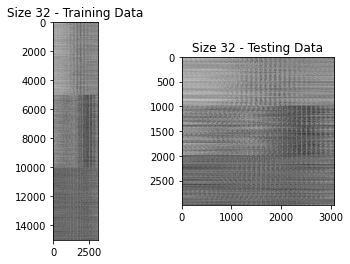

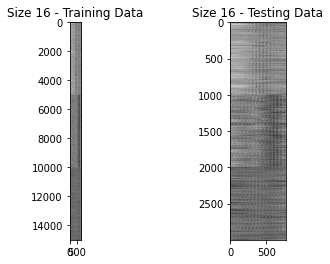

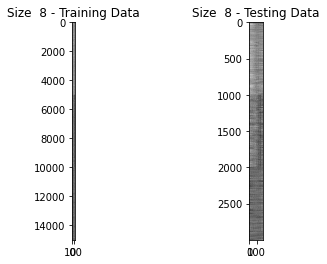

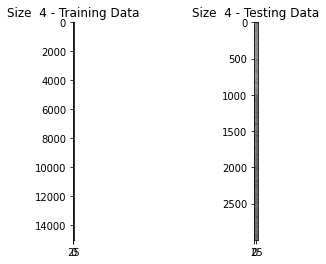

In [56]:
Plot_Data([X_Train_32, X_Test_32], ['Size 32 - Training Data', 'Size 32 - Testing Data'])
Plot_Data([X_Train_16, X_Test_16], ['Size 16 - Training Data', 'Size 16 - Testing Data'])
Plot_Data([X_Train_8 , X_Test_8 ], ['Size  8 - Training Data', 'Size  8 - Testing Data'])
Plot_Data([X_Train_4 , X_Test_4 ], ['Size  4 - Training Data', 'Size  4 - Testing Data'])

<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [70]:
#confusion_matrices_nb += [confusion_matrix]
airplane_mean_32, airplane_variance_32 = np.mean(X_Train_32[: 5000], axis = 0), np.var(X_Train_32[: 5000], axis = 0)
airplane_mean_16, airplane_variance_16 = np.mean(X_Train_16[: 5000], axis = 0), np.var(X_Train_16[: 5000], axis = 0)
airplane_mean_8,  airplane_variance_8  = np.mean(X_Train_8[ : 5000], axis = 0), np.var(X_Train_8[ : 5000], axis = 0)
airplane_mean_4,  airplane_variance_4  = np.mean(X_Train_4[ : 5000], axis = 0), np.var(X_Train_4[ : 5000], axis = 0)

automobile_mean_32, automobile_variance_32 = np.mean(X_Train_32[5000 : 10000], axis = 0), np.var(X_Train_32[5000 : 10000], axis = 0)
automobile_mean_16, automobile_variance_16 = np.mean(X_Train_16[5000 : 10000], axis = 0), np.var(X_Train_16[5000 : 10000], axis = 0)
automobile_mean_8,  automobile_variance_8  = np.mean(X_Train_8[ 5000 : 10000], axis = 0), np.var(X_Train_8[ 5000 : 10000], axis = 0)
automobile_mean_4,  automobile_variance_4  = np.mean(X_Train_4[ 5000 : 10000], axis = 0), np.var(X_Train_4[ 5000 : 10000], axis = 0)

frog_mean_32, frog_variance_32 = np.mean(X_Train_32[10000 : ], axis = 0), np.var(X_Train_32[10000 : ], axis = 0)
frog_mean_16, frog_variance_16 = np.mean(X_Train_16[10000 : ], axis = 0), np.var(X_Train_16[10000 : ], axis = 0)
frog_mean_8,  frog_variance_8  = np.mean(X_Train_8[ 10000 : ], axis = 0), np.var(X_Train_8[ 10000 : ], axis = 0)
frog_mean_4,  frog_variance_4  = np.mean(X_Train_4[ 10000 : ], axis = 0), np.var(X_Train_4[ 10000 : ], axis = 0)

In [101]:
def Calculate_Probability(pixel: float, mean: float, variance: float) -> float:
    return 1 / (np.sqrt(2 * np.pi * variance)) * np.exp((-1 * (pixel - mean) ** 2) / 2 * variance)

Cal_Prob = np.vectorize(Calculate_Probability)

In [102]:
Cal_Prob(X_Test_32[0], airplane_mean_32[0], airplane_variance_32[0])

array([1.4800502 , 1.4798958 , 1.47909613, ..., 1.47249107, 1.47568499,
       1.47467213])

In [92]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
np.prod(x)

5040

In [84]:
X_Test_32[0]

array([0.55294118, 0.62352941, 0.70196078, ..., 0.19215686, 0.28235294,
       0.25098039])

In [85]:
airplane_mean_32[0]

0.5678925490196093

In [86]:
airplane_variance_32[0]

0.07265410966920431

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [ ]:
#confusion_matrices_gm += [confusion_matrix]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [ ]:
#confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


In [ ]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
Edit Here
###